# Analiziranje knjig

V tej datoteki analiziramo podatke, povezane z osebami iz fantazijske zbirke knjig "Malazan Book of the Fallen" avtorja Stevena Eriksona in zbirke "Novels of the Malazan Empire" avtorja Ian C. Esslemonta. V prvi zbirki je 10 knjig, v drugi pa 6.

In [2]:
import os
import pandas as pd

directory_obdelani = 'podatki-obdelani'
csv_osebe = 'osebe.csv'
csv_knjige = 'knjige.csv'
#količina izpisanih vrstic
pd.set_option("display.max_rows", 12)
# izberemo interaktivni "notebook" stil risanja
%matplotlib inline
path_osebe = os.path.join(directory_obdelani, csv_osebe)
osebe = pd.read_csv(path_osebe)
osebe.index += 1

path_knjige = os.path.join(directory_obdelani, csv_knjige)
knjige = pd.read_csv(path_knjige)
knjige.index += 1

## 1. Osnovne informacije

### 1.1 Razpredelnica - knjige

Tu imamo razpredelnico, iz katere pridobivamo podatke za nadalnje analiziranje. V njej imamo polna imena knjig in njihove kratice, ki se uporabljajo v prikazu podatkov. Podatke za analizo jemljemo tudi iz razpredelnice za osebe.

In [3]:
knjige

,ime,kratica
1,Gardens of the Moon,GotM
2,Deadhouse Gates,DG
3,Memories of Ice,MoI
4,House of Chains,HoC
5,Midnight Tides,MT
...,...,...
12,Return of the Crimson Guard,RotCG
13,Stonewielder,SW
14,Blood and Bone,BB
15,Orb Sceptre Throne,OST


## 2. Tabele

### 2.1 Pojavitve po knjigi

In [5]:
knjige_pojavitve = {}
for j in knjige['kratica']:
    knjige_pojavitve[j] = 0
    for k in osebe['pojavljanje']:
        if str(j) in str(k):
            knjige_pojavitve[j] += 1

knjige_ = {'knjige':list(knjige_pojavitve.keys()), 'pojavitve':list(knjige_pojavitve.values())}
knjige_pd = pd.DataFrame.from_dict(knjige_)
knjige_pd = knjige_pd.set_index(['knjige'])
knjige_pd

,pojavitve
knjige,
GotM,88
DG,92
MoI,118
HoC,135
MT,90
...,...
RotCG,7
SW,5
BB,2


### 3. Grafi

### 3.1 Graf pojavitve po knjigi

<Axes: title={'center': 'Število oseb, ki se pojavijo v knjigi'}, xlabel='knjiga', ylabel='število oseb'>

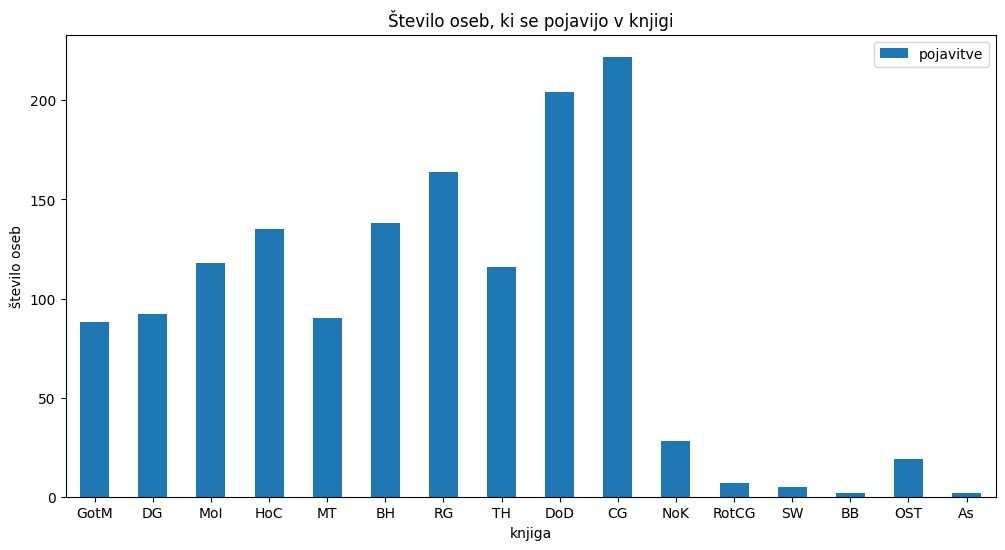

In [6]:
knjige_pd.plot.bar(xlabel='knjiga', ylabel='število oseb', figsize=(12, 6), title='Število oseb, ki se pojavijo v knjigi', rot=0)